# CI280 - Final Project - Part B
# Data Preparation, Sort, Groupby and Plot

## Name: Shamaila Afreen


In [26]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 8))

In [27]:
df = pd.read_csv('covid-data.csv')

In [28]:
# limiting the display rows
pd.set_option('display.max_rows', 5)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56319,NaN,NaN,International,2020-11-11,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56320,NaN,NaN,International,2020-11-12,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df = df[ (df['location'] != 'World') ]
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56319,NaN,NaN,International,2020-11-11,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56320,NaN,NaN,International,2020-11-12,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Show number of records 
import random
number = random.randint(0,10000)
print("Shamaila Afreen, 21500", number )
print('------------------------------')

print("Number of records:" ,len(df))

Shamaila Afreen, 21500 5521
------------------------------
Number of records: 56003


## C) Handing Missing Data and Ploting (20 pts)

### use isnull() vs. notnull()
### use dropna
### use replacena

In [31]:
# show last five rows
df.tail(5)     

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
56316,NaN,NaN,International,2020-11-08,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56317,NaN,NaN,International,2020-11-09,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56318,NaN,NaN,International,2020-11-10,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56319,NaN,NaN,International,2020-11-11,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56320,NaN,NaN,International,2020-11-12,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# show the number of rows and columns of dataframe 
df.shape
number = random.randint(0,10000)
print("Shamaila Afreen, 21500 ", number )
print('------------------------------')

# 1) Show the number records of miss data for continent ( 2 pts)
#    Show the the last five those records 

print('The number records missing data for continent')
print(len(df[df.continent.isnull()]))
df[df.continent.isnull()].tail()





Shamaila Afreen, 21500  1328
------------------------------
The number records missing data for continent
318


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
56316,NaN,NaN,International,2020-11-08,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56317,NaN,NaN,International,2020-11-09,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56318,NaN,NaN,International,2020-11-10,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56319,NaN,NaN,International,2020-11-11,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56320,NaN,NaN,International,2020-11-12,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
number = random.randint(0,10000)
print("Shamaila Afreen, 21500 ", number )
print('-------------------')


# 2-3) Show the number records of miss data for continent and iso_code (2 pts)
#    Show the the last five those records ( 2 pts)

print('The number records missing data for continent and iso_code')
print(len(df[df.continent.isnull() & df.iso_code.isnull()]))
df[df.continent.isnull() & df.iso_code.isnull()].tail()




Shamaila Afreen, 21500  7236
-------------------
The number records missing data for continent and iso_code
318


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
56316,NaN,NaN,International,2020-11-08,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56317,NaN,NaN,International,2020-11-09,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56318,NaN,NaN,International,2020-11-10,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56319,NaN,NaN,International,2020-11-11,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56320,NaN,NaN,International,2020-11-12,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
number = random.randint(0,10000)
print("Shamaila Afreen, 21500", number )
print('------------------------------')


# 4-5) For the records for United Kingdom, which columns has missing data (4 pts)
res = df[df['location']=='United Kingdom']
res

col_names = res.columns
col_names

print('The following columns are missing data for United Kingdom')

print('Column name \t\t\t\tMissing Data')
print('------------------------------------------------')
for name in col_names:
    num = len(res[res[name].isnull()])
    if num > 0:
        print('{0: <40}'.format(name), num)



Shamaila Afreen, 21500 2775
------------------------------
The following columns are missing data for United Kingdom
Column name 				Missing Data
------------------------------------------------
total_cases                              32
new_cases_smoothed                       6
total_deaths                             67
new_deaths_smoothed                      6
total_cases_per_million                  32
new_cases_smoothed_per_million           6
total_deaths_per_million                 67
new_deaths_smoothed_per_million          6
icu_patients                             97
icu_patients_per_million                 97
hosp_patients                            91
hosp_patients_per_million                91
weekly_icu_admissions                    318
weekly_icu_admissions_per_million        318
weekly_hosp_admissions                   281
weekly_hosp_admissions_per_million       281
total_tests                              93
new_tests                                93
total_tests_p

In [35]:
number = random.randint(0,10000)
print("Shamaila Afreen, 21500", number )
print('------------------------------')


#df.columns

df.shape
# .dropna() vs. . dropna(how='all')

# 6) Show the result after droping rows which have at least one NaN data in the dataset ()  (2 pts)
cleaned = df.dropna()

print('After using .dropn(), total records: ')
print(len(cleaned))






Shamaila Afreen, 21500 2363
------------------------------
After using .dropn(), total records: 
0


In [53]:
number = random.randint(0,10000)
print("Shamaila Afreen, 21500 ", number )
print('------------------------------')

# 7) Show the result after after droping rows which all data is NaN in the dataset ()  (2 pts)
res = df[df['location']=='United Kingdom']
res
cleaned = res.dropna(how='all')

print("After using .dropna(how='all'), total records:")
print(len(cleaned))




Shamaila Afreen, 21500  9921
------------------------------
After using .dropna(how='all'), total records:
318


In [37]:
number = random.randint(0,10000)
print("Shamaila Afreen, 21500 ", number )
print('------------------------------')

print(df.shape)
print('Original row number:', len(df))

# 8) Show the result after dropping the rows which continent or iso data is missing in the dataset
#    How many rows are dropped. (2 pts)

cleaned_data = df[df.continent.notnull() & df.iso_code.notnull()]
bad_data = df[df.continent.isnull() | df.iso_code.isnull()]
print('After droping all missing data of continent or iso in the dataset')
print('New dataset included record number:', len(cleaned_data))
print('The number of rows droped:', len(bad_data))





Shamaila Afreen, 21500  270
------------------------------
(56003, 49)
Original row number: 56003
After droping all missing data of continent or iso in the dataset
New dataset included record number: 55685
The number of rows droped: 318


In [38]:
res = df[df['location']=='United Kingdom']
res[['location','handwashing_facilities']]

,location,handwashing_facilities
18467,United Kingdom,NaN
18468,United Kingdom,NaN
...,...,...
18783,United Kingdom,NaN
18784,United Kingdom,NaN


In [40]:

# 9) Show United Kingdom's handwashing_facilities information
#    Show the average of handwashing_facilities of worldwide level

import random
number = random.randint(0,10000)
print("Shamaila Afreen, 21500", number )
print('------------------------------')

#print(df['handwashing_facilities'].describe())


print("Handwashing_facilities values are missing in United Kingdom")
res = df[df['location']=='United Kingdom']
print(len(res))
data = res[res['handwashing_facilities'].isnull()] [['location','date','handwashing_facilities']]
print(data)

avg = df['handwashing_facilities'].mean()
print('The average of handwashing facilities worldwide:', format(avg, '.0f'))






Shamaila Afreen, 21500 583
------------------------------
Handwashing_facilities values are missing in United Kingdom
318
             location        date  handwashing_facilities
18467  United Kingdom  2019-12-31                     NaN
18468  United Kingdom  2020-01-01                     NaN
...               ...         ...                     ...
18783  United Kingdom  2020-11-11                     NaN
18784  United Kingdom  2020-11-12                     NaN

[318 rows x 3 columns]
The average of handwashing facilities worldwide: 52


In [41]:
number = random.randint(0,10000)
print("Shamaila Afreen, 21500 ", number )
print('------------------------------')

import math

# 10) Replace handwashing_facilities in United Kingdom as the average of worldwide level (2 pts)

res = df[df['location']=='United Kingdom']
avg = df['handwashing_facilities'].mean()
avg = math.floor(avg)

print('Now handwashing facilities values are replaced by the average of worldwide level')
data

res['handwashing_facilities'].fillna(avg, inplace=True)
res[['location', 'date','handwashing_facilities']]





Shamaila Afreen, 21500  2967
------------------------------
Now handwashing facilities values are replaced by the average of worldwide level


C:\Users\shama\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,location,date,handwashing_facilities
18467,United Kingdom,2019-12-31,52.0
18468,United Kingdom,2020-01-01,52.0
...,...,...,...
18783,United Kingdom,2020-11-11,52.0
18784,United Kingdom,2020-11-12,52.0


# D) Sorting, Grouping and Plotting (30 points) 

## df.sort_values(by=['a','b'], ascending = True)
## df.sort_index()
## df.groupby( )

In [42]:
number = random.randint(0,10000)
print("Shamaila Afreen, 21500", number )
print('------------------------------')
import matplotlib.pyplot as plt

# 1)  (3 pts) Find the top 10 countries which have the most covid cases

# Group all cases by location , become series
cases = df.groupby(df.location).new_cases.sum()
cases = cases.sort_values(ascending = False)
cases

res = cases.head(10)
countries = res.index

print('Ten countries which have the most covid cases:')
print('Country              Covid cases')
print('---------------------------------------------')
for country in countries:
    print('{0: <20}'.format(country), '\t', format(res[country],'.0f'))








Shamaila Afreen, 21500 9426
------------------------------
Ten countries which have the most covid cases:
Country              Covid cases
---------------------------------------------
United States        	 10401132
India                	 8683916
Brazil               	 5675032
France               	 1865538
Russia               	 1836960
Spain                	 1417709
Argentina            	 1273342
United Kingdom       	 1256725
Colombia             	 1165326
Italy                	 1028424


Shamaila Afreen, 21500  277
------------------------------
Index(['United States', 'India', 'Brazil', 'France', 'Russia', 'Spain',
       'Argentina', 'United Kingdom', 'Colombia', 'Italy'],
      dtype='object', name='location')
[10401132.  8683916.  5675032.  1865538.  1836960.  1417709.  1273342.
  1256725.  1165326.  1028424.]


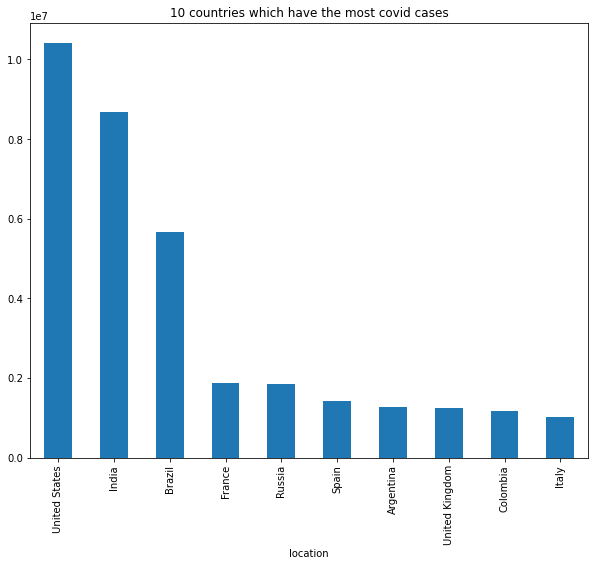

In [43]:
number = random.randint(0,10000)
print("Shamaila Afreen, 21500 ", number )
print('------------------------------')


# 2) Use bar chart to show the top 10 countries which have the most covid cases. (3 pts)
res = cases.head(10)
res

print(res.index)
print(res.values)

res.plot(kind='bar', title='10 countries which have the most covid cases')



Shamaila Afreen, 21500  2650
------------------------------
10 days which have the most Covid Cases
Date                     Covid Cases
---------------------------------------------------
2020-10-30 	 548119
2020-10-31 	 542125
2020-11-05 	 569731
2020-11-06 	 590129
2020-11-07 	 584512
2020-11-08 	 573453
2020-11-09 	 518189
2020-11-10 	 553691
2020-11-11 	 544449
2020-11-12 	 558905


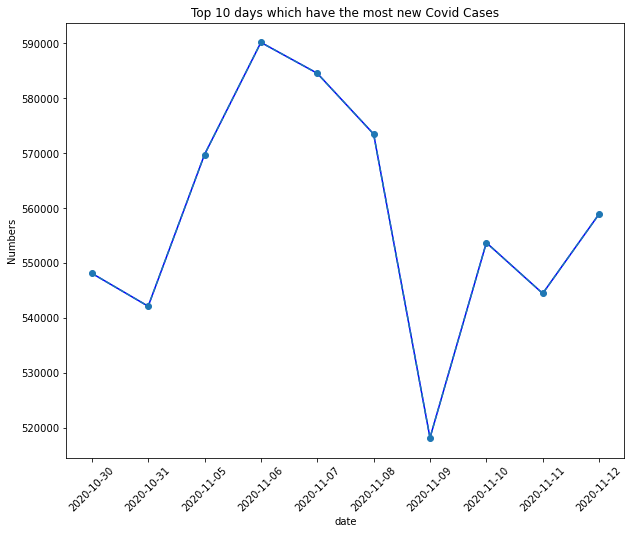

In [44]:
number = random.randint(0,10000)
print("Shamaila Afreen, 21500 ", number )
print('------------------------------')

# (3  pts)

# 3) Show worldwide, which ten day has the most new cases? 

#    Use line chart to show the top 10 days which have the most new covid cases 

cases = df.groupby(df.date).new_cases.sum()
cases = cases.sort_values(ascending = False)

res = cases.head(10)
res = res.sort_index()

days = res.index



print ('10 days which have the most Covid Cases')
print ('Date                     Covid Cases')
print ('---------------------------------------------------')

for day in days:
    print(day, '\t', format (res[day], '.0f'))



# Draw bar chart
plt.title('Top 10 days which have the most new Covid Cases')
plt.xlabel('Date')
plt.ylabel('Numbers')

plt.plot(res.index,res.values, color ='b')

res.plot (kind='line', rot = 45, linestyle = 'dashed' , marker = 'o')




Shamaila Afreen, 21500  1120
------------------------------
On 2020-11-10
10 countries which have the most covid cases on 2020-11-10
Country               Covid cases
----------------------------------------------------
Brazil               	 63536
Switzerland          	 17245
Spain                	 17395
France               	 20155
United Kingdom       	 21350
India                	 38073
Italy                	 25269
Poland               	 21713
Russia               	 21798
United States        	 138901


<BarContainer object of 10 artists>

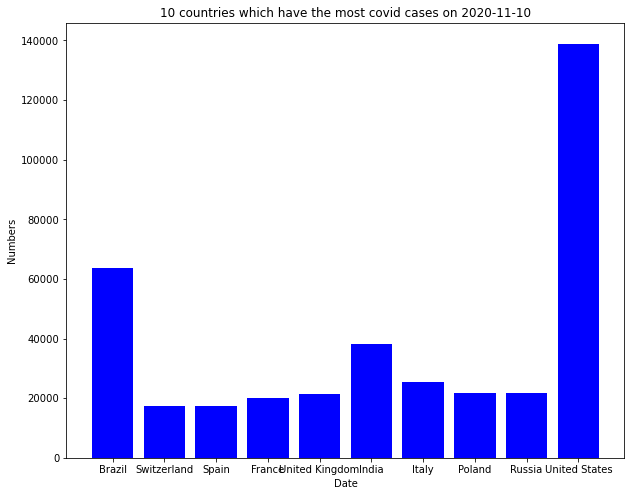

In [47]:
number = random.randint(0,10000)
print("Shamaila Afreen, 21500 ", number )
print('------------------------------')

# (3  pts)

# 4) On 2020-11-30, which ten countries has the most new cases? 

#    Use bar chart to show the top 10 location which have the most new covid cases 
res = df[df.date=='2020-11-10']


#Sorting cases
cases = res.sort_values(by='new_cases', ascending = False)


res = cases.head(10)[['location','new_cases']]
res = res.sort_index()


#Display dataframes
print("On 2020-11-10")
print("10 countries which have the most covid cases on 2020-11-10")
print("Country               Covid cases")
print('----------------------------------------------------')


for i in res.index:
    country = res['location'][i]
    new_cases = res['new_cases'][i]
    print('{0: <20}'.format(country), '\t', format(new_cases, '.0f'))
    
    
      
# Draw bar chart
plt.title("10 countries which have the most covid cases on 2020-11-10")
plt.xlabel("Date")
plt.ylabel("Numbers")

plt.bar(res['location'],res['new_cases'], color='b')


  

Shamaila Afreen, 21500 7213
------------------------------

In the past seven days the new cases in United Kingdom
Date             Covid cases
------------------------------------------------
2020-11-06 	 24138
2020-11-07 	 23287
2020-11-08 	 24957
2020-11-09 	 20572
2020-11-10 	 21350
2020-11-11 	 20412
2020-11-12 	 22950


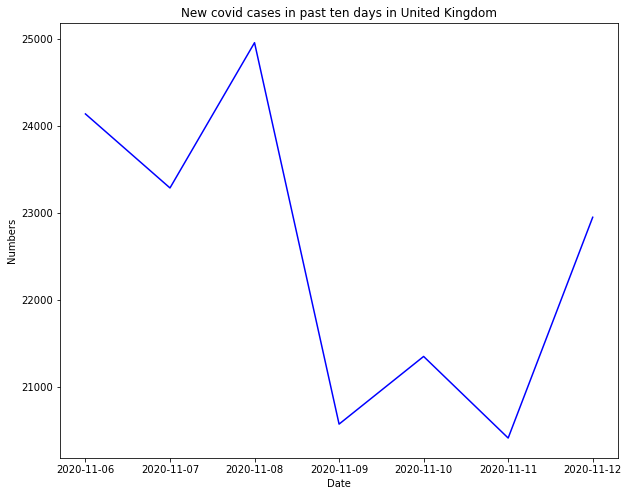

In [48]:
number = random.randint(0,10000)
print("Shamaila Afreen, 21500", number )
print('------------------------------')

# (3  pts)

#  5)  Show last seven days, the new cases in United Kingdom (Chose one country),
#      Plot a line chart

cases = df[df.location=='United Kingdom'].sort_values(by='date', ascending=True)
cases
res = cases[['date','new_cases']].tail(7)

print('\nIn the past seven days the new cases in United Kingdom')
print('Date             Covid cases')
print('------------------------------------------------')

dates = res['date']
for i in res.index:
    print(res['date'][i], '\t', format(res['new_cases'][i], '.0f'))

plt.title('New covid cases in past ten days in United Kingdom')
plt.xlabel('Date')
plt.ylabel('Numbers')

plt.plot(res['date'],res['new_cases'],color='b')



Shamaila Afreen, 21500 1835
------------------------------
Total covid new cases by continent
----------------------------------
Asia                 	 14762053
Europe               	 12908695
North America        	 12439797
South America        	 10064053
Africa               	 1918097
Oceania              	 46830


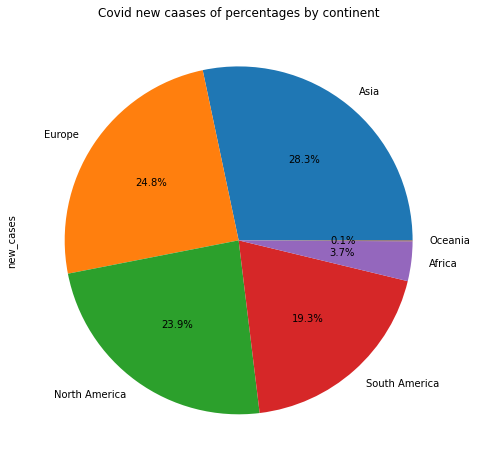

In [49]:
number = random.randint(0,10000)
print("Shamaila Afreen, 21500", number )
print('------------------------------')


# 6-7) Group by contient, show total of new covid cases for each contient and sorted by total number
#    Plot the result by pie chart (3 pts)
df
res = df.groupby(df.continent).new_cases.sum().sort_values(ascending=False)

print('Total covid new cases by continent')
print('----------------------------------')
names = res.index
for name in names:
    print('{0: <20}'.format(name), '\t', format(res[name], '.0f'))

res.plot(kind='pie', title='Covid new caases of percentages by continent', autopct='%1.1f%%')








In [50]:
number = random.randint(0,10000)
print("Shamaila Afreen, 21500 ", number )
print('------------------------------')

# 8) Show the top 10 countries which have the most population  (3 pts)
df

res = df[df.date=='2020-11-10'][['location', 'population']].sort_values(by = 'population', ascending = False)
res = res.head(10)
res.index

print('Top 10 countries which have the most POPULATION')
for i in res.index:
    print('{0: <20}'.format(res['location'][i]), format(res['population'][i], '.0f'))

res2 = res.set_index('location')








Shamaila Afreen, 21500  5165
------------------------------
Top 10 countries which have the most POPULATION
China                1439323774
India                1380004385
United States        331002647
Indonesia            273523621
Pakistan             220892331
Brazil               212559409
Nigeria              206139587
Bangladesh           164689383
Russia               145934460
Mexico               128932753


Shamaila Afreen, 21500 4232
------------------------------
The world population 7751240425.0
Population by continent
------------------------------
Asia                 	 1427892009265
Africa               	 354166662782
Europe               	 228735074965
North America        	 182216265341
South America        	 123534039010
Oceania              	 12230293958


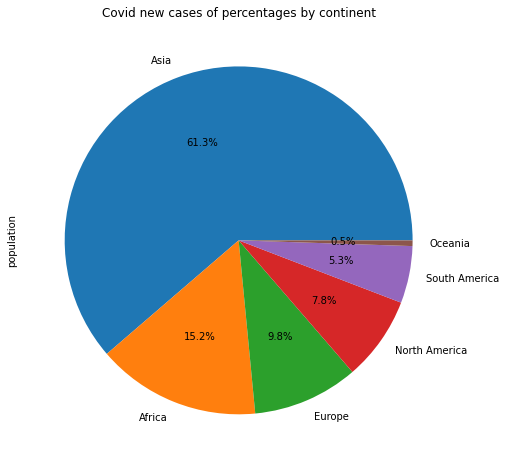

In [51]:
number = random.randint(0,10000)
print("Shamaila Afreen, 21500", number )
print('------------------------------')

# 9-10) Show the world poplation
#      Show the  population by each continent and show it as pie chart (6 pts)
data = df[df.date=='2020-11-10']
pop_sum = data['population'].sum()
print('The world population', pop_sum)

data = df[df.date=='2020-11-10'][['continent', 'location', 'date', 'population']]

res = df.groupby([df.continent]).population.sum().sort_values(ascending = False)

print('Population by continent')
print('------------------------------')
names = res.index
for name in names:
    print('{0: <20}'.format(name), '\t', format(res[name], '.0f'))

res.plot(kind='pie', title='Covid new cases of percentages by continent', autopct='%1.1f%%')

